In [ ]:
#installing the sweetviz python lib so that we can have top view of the raw data and observe the relation between the columns,
#also we can have look at the distinct values, missing values in the raw data and takes steps accordingly
!pip install sweetviz

In [ ]:
import pandas as pd # importing pandas lib in order to work with data frame
import os # load the os module, which provides a way of using operating system dependent functionality. This module contains various functions to interact with the file system, manage processes, and access the environment.
import numpy as np
import seaborn as sns # used for data viz
import sweetviz as sv

In [ ]:
df = pd.read_csv("/content/osteoporosis.csv") # reading the csv file
df.head() # retrieving the top 5 row from the data frame

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,1734616,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,1419098,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,1797916,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,1805337,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,1351334,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


In [ ]:
df.shape

(1958, 16)

In [ ]:
#This method is used to generate and save the analysis report as an interactive HTML file.
report = sv.analyze(df)
report.show_html('sweetviz_report.html', open_browser = False)

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated.


In [ ]:
#built-in method in Pandas that provides descriptive statistics for your DataFrame df.
#It summarizes the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN (missing) values.
df.describe()

,Id,Age,Osteoporosis
count,1.958000e+03,1958.000000,1958.000000
mean,1.549929e+06,39.101124,0.500000
std,2.614250e+05,21.355424,0.500128
min,1.100064e+06,18.000000,0.000000
25%,1.319163e+06,21.000000,0.000000
50%,1.546028e+06,32.000000,0.500000
75%,1.775870e+06,53.000000,1.000000
max,1.999676e+06,90.000000,1.000000


In [ ]:
df.columns # output all the columns in the data frame

Index(['Id', 'Age', 'Gender', 'Hormonal Changes', 'Family History',
       'Race/Ethnicity', 'Body Weight', 'Calcium Intake', 'Vitamin D Intake',
       'Physical Activity', 'Smoking', 'Alcohol Consumption',
       'Medical Conditions', 'Medications', 'Prior Fractures', 'Osteoporosis'],
      dtype='object')

In [ ]:
df.isnull().sum() # extract all the null values in the data frame

,0
Id,0
Age,0
Gender,0
Hormonal Changes,0
Family History,0
Race/Ethnicity,0
Body Weight,0
Calcium Intake,0
Vitamin D Intake,0
Physical Activity,0


Here in the above output, "Alcohol Consumption", "Medical Conditions", "Medications" are the columns which are having the null values. Here the pandas lib is treating the "None" as Null values.

In [ ]:
df.dtypes # checking the data type of the all the columns. This helps in the feature scaling

,0
Id,int64
Age,int64
Gender,object
Hormonal Changes,object
Family History,object
Race/Ethnicity,object
Body Weight,object
Calcium Intake,object
Vitamin D Intake,object
Physical Activity,object


what is object datatype?

The text data type is known as a string in Python, or object in pandas. Strings can contain numbers and / or characters.

Difference between dependent and independent variables.

In [ ]:
#all unique values in the data frame

for column in df.columns:
  unique_values = df[column].unique()
  print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'Id': [1734616 1419098 1797916 ... 1990957 1779848 1282963]
Unique values in column 'Age': [69 32 89 78 38 41 20 39 70 19 47 55 81 77 50 75 66 76 59 79 64 68 72 24
 90 56 35 21 31 26 88 61 25 52 53 67 23 71 80 51 65 57 43 58 46 62 82 18
 28 22 45 29 40 54 44 60 30 49 83 74 87 73 36 85 34 86 33 37 84 48 42 63
 27]
Unique values in column 'Gender': ['Female' 'Male']
Unique values in column 'Hormonal Changes': ['Normal' 'Postmenopausal']
Unique values in column 'Family History': ['Yes' 'No']
Unique values in column 'Race/Ethnicity': ['Asian' 'Caucasian' 'African American']
Unique values in column 'Body Weight': ['Underweight' 'Normal']
Unique values in column 'Calcium Intake': ['Low' 'Adequate']
Unique values in column 'Vitamin D Intake': ['Sufficient' 'Insufficient']
Unique values in column 'Physical Activity': ['Sedentary' 'Active']
Unique values in column 'Smoking': ['Yes' 'No']
Unique values in column 'Alcohol Consumption': ['Moderate' nan]
Unique values in col

#Data Preprocessing


In [ ]:
df.loc[(df['Gender'] == 'Male') & (df['Hormonal Changes'] == 'Postmenopausal'), 'Hormonal Changes'] = 'Andropause'
df.loc[(df['Gender'] == 'Female') & (df['Age'] <= 45) & (df['Hormonal Changes'] == 'Postmenopausal'), 'Hormonal Changes'] = 'Early Menopause'
df

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,1734616,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,1419098,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,1797916,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,1805337,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,1351334,38,Male,Andropause,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,1991635,19,Female,Normal,Yes,African American,Normal,Adequate,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,NaN,Yes,0
1954,1528601,23,Female,Early Menopause,Yes,Caucasian,Underweight,Low,Insufficient,Active,No,NaN,NaN,Corticosteroids,No,0
1955,1990957,34,Female,Early Menopause,No,African American,Underweight,Low,Sufficient,Sedentary,No,NaN,Hyperthyroidism,NaN,No,0
1956,1779848,25,Male,Andropause,No,African American,Normal,Low,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,Yes,0


loc is used for filtering of rows and selection column

In [ ]:
#after doing the data pre processing we are again looking at the unique values in each column, inorder to verify whether changes have been made or not
for column in df.columns:
  unique_values = df[column].unique()
  print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'Id': [1734616 1419098 1797916 ... 1990957 1779848 1282963]
Unique values in column 'Age': [69 32 89 78 38 41 20 39 70 19 47 55 81 77 50 75 66 76 59 79 64 68 72 24
 90 56 35 21 31 26 88 61 25 52 53 67 23 71 80 51 65 57 43 58 46 62 82 18
 28 22 45 29 40 54 44 60 30 49 83 74 87 73 36 85 34 86 33 37 84 48 42 63
 27]
Unique values in column 'Gender': ['Female' 'Male']
Unique values in column 'Hormonal Changes': ['Normal' 'Postmenopausal' 'Andropause' 'Early Menopause']
Unique values in column 'Family History': ['Yes' 'No']
Unique values in column 'Race/Ethnicity': ['Asian' 'Caucasian' 'African American']
Unique values in column 'Body Weight': ['Underweight' 'Normal']
Unique values in column 'Calcium Intake': ['Low' 'Adequate']
Unique values in column 'Vitamin D Intake': ['Sufficient' 'Insufficient']
Unique values in column 'Physical Activity': ['Sedentary' 'Active']
Unique values in column 'Smoking': ['Yes' 'No']
Unique values in column 'Alcohol Consumption': ['Mode

In [ ]:
#Ordinal Encoding
df['Gender'].replace(['Male', 'Female'],[0, 1], inplace=True)
df['Hormonal Changes'].replace(['Normal', 'Postmenopausal' ,'Andropause' ,'Early Menopause'], [0,1,2,3], inplace = True)
df['Family History'].replace(['Yes','No'],[0,1], inplace = True)
df['Race/Ethnicity'].replace(['Asian', 'Caucasian' ,'African American'], [0,1,2], inplace= True)
df['Body Weight'].replace(['Underweight', 'Normal'], [0,1], inplace =True)
df['Calcium Intake'].replace(['Low', 'Adequate'], [0,1], inplace= True)
df['Vitamin D Intake'].replace(['Sufficient' ,'Insufficient'], [0,1], inplace = True)
df['Physical Activity'].replace(['Sedentary', 'Active'], [0,1], inplace = True)
df['Smoking'].replace(['Yes', 'No'], [1,0], inplace = True)
df['Alcohol Consumption'].replace(['Moderate', np.NaN], [1,0], inplace =True)
df['Alcohol Consumption'] = df['Alcohol Consumption'].astype(int) # converting the output to int type
df['Medical Conditions'].replace(['Rheumatoid Arthritis', np.NaN ,'Hyperthyroidism'], [1,0,2], inplace= True)
df['Medications'].replace(['Corticosteroids', np.NaN], [1,0], inplace = True)
df['Medications'] = df['Medications'].astype(int)#converting the output to int type
df['Prior Fractures'].replace(['Yes', 'No'], [1,0],  inplace = True)
df.tail()

<ipython-input-35-df9b878260e0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace(['Male', 'Female'],[0, 1], inplace=True)
<ipython-input-35-df9b878260e0>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'].replace(['Male', 'Female'],[0, 1], inplace=True)
<ipython-input

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
1953,1991635,19,1,0,0,2,1,1,0,0,1,1,1,0,1,0
1954,1528601,23,1,3,0,1,0,0,1,1,0,0,0,1,0,0
1955,1990957,34,1,3,1,2,0,0,0,0,0,0,2,0,0,0
1956,1779848,25,0,2,1,2,1,0,1,0,1,0,1,1,1,0
1957,1282963,26,1,3,1,2,0,1,0,0,1,0,1,1,0,0


In [ ]:
# import pandas as pd
# # Step 2: Check how many rows have Age = 20
# age_20_count = df[df['Age'] == 20].shape[0]
# print(f"Number of rows with Age = 20: {age_20_count}")


# # Option 2: Keep only a few rows with Age 20 (sampling 10 rows as an example)
# df_age_20 = df[df['Age'] == 20].sample(n=10, random_state=42)  # Keep only 10 rows with Age = 20
# df = pd.concat([df[df['Age'] != 20], df_age_20])

# # Step 4: Check the new distribution of Age
# print("New Age distribution after removing/sampling Age 20:")
# print(df['Age'].value_counts())

# # Save the updated dataset
# # df.to_csv("updated_dataset.csv", index=False)
# # df.head()
# df.tail()


Number of rows with Age = 20: 109
New Age distribution after removing/sampling Age 20:
Age
18    152
19    147
34    121
29    118
21    117
     ... 
82      9
28      8
60      8
58      7
48      6
Name: count, Length: 73, dtype: int64


,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
1486,1996620,20,1,0,1,2,0,0,0,0,0,1,0,1,1,0
1149,1270971,20,1,0,1,2,1,1,0,0,1,1,0,1,0,0
1335,1407270,20,0,2,1,1,0,1,1,1,1,0,2,1,0,0
1829,1370874,20,0,0,1,1,0,1,0,0,0,0,2,1,1,0
699,1288415,20,1,3,1,0,1,1,0,1,0,0,0,1,1,1


In [ ]:
# Count the number of people with age below 30
people_below_30 = df[df['Age'] < 30].shape[0]

# Display the result
print(f"Number of people below the age of 30: {people_below_30}")


Number of people below the age of 30: 951


In [ ]:
# Remove rows where Age is below 30
df = df[df['Age'] >= 30]

# Display the updated dataset
df.head()

# Optional: Check the shape of the dataset after removal
print(f"Data shape after removing rows with age below 30: {df.shape}")


Data shape after removing rows with age below 30: (1007, 16)


In [ ]:
df.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,1734616,69,1,0,0,0,0,0,0,0,1,1,1,1,1,1
1,1419098,32,1,0,0,0,0,0,0,0,0,0,0,0,1,1
2,1797916,89,1,1,1,1,1,1,0,1,0,1,2,1,0,1
3,1805337,78,1,0,1,1,0,1,1,0,1,0,1,1,0,1
4,1351334,38,0,2,0,2,1,0,0,1,1,0,1,0,1,1


In [ ]:
df.to_csv('Preprocessed_data.csv')


NameError: name 'df' is not defined

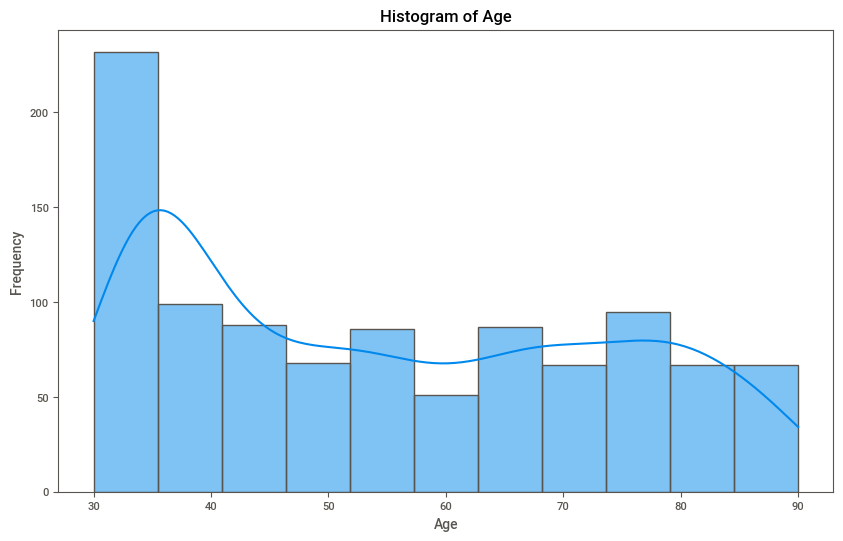

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a histogram to visually inspect normality
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


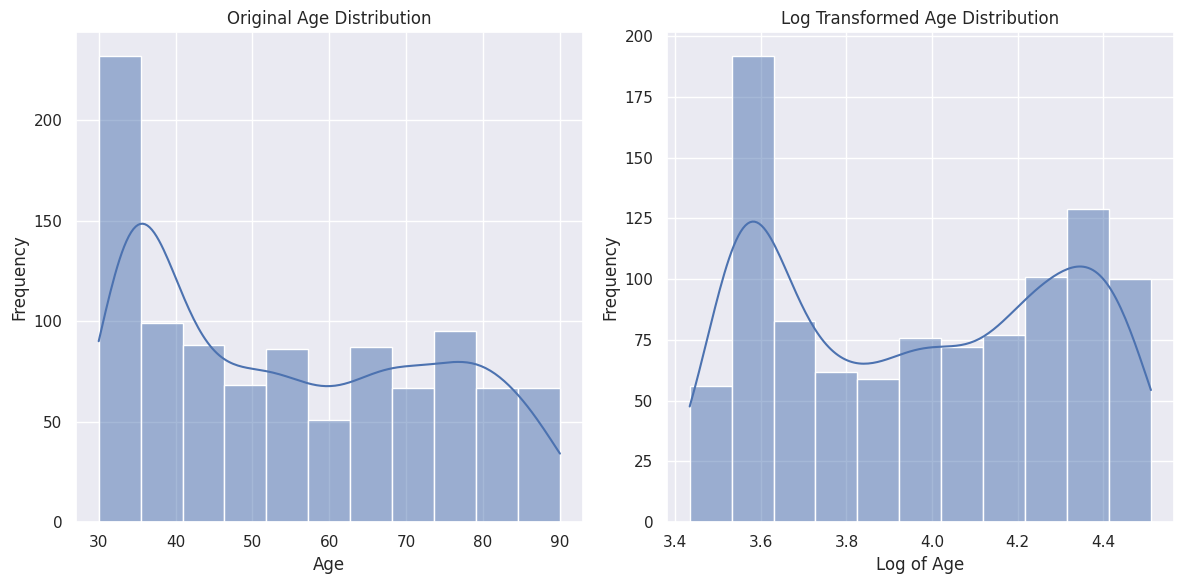

In [ ]:
# # Log transformation
# df['Age_log'] = np.log(df['Age'] + 1)

# # Plotting the original and transformed data for comparison
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# sns.histplot(df['Age'], kde=True)
# plt.title('Original Age Distribution')
# plt.xlabel('Age')
# plt.ylabel('Frequency')

# plt.subplot(1, 2, 2)
# sns.histplot(df['Age_log'], kde=True)
# plt.title('Log Transformed Age Distribution')
# plt.xlabel('Log of Age')
# plt.ylabel('Frequency')

# plt.tight_layout()
# plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib  # Importing joblib to save the model

# Assuming 'df' is your cleaned dataset
# Separate features and target variable
X = df.drop(columns=['Osteoporosis'])  # Features
y = df['Osteoporosis']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classifiers to evaluate
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC()
}

# Store performance metrics
performance_metrics = {}
best_model_instance = None

# Train each classifier and evaluate performance
for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate accuracy and store metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    performance_metrics[name] = {
        "Accuracy": accuracy,
        "Precision": report['1']['precision'],
        "Recall": report['1']['recall'],
        "F1-Score": report['1']['f1-score'],
        "Support": report['1']['support']
    }

# Convert performance metrics to DataFrame for better visualization
performance_df = pd.DataFrame(performance_metrics).T

# Display the performance metrics
print(performance_df)

# Find the best model based on F1-Score (or any other metric of your choice)
best_model_name = performance_df['F1-Score'].idxmax()
best_model_instance = classifiers[best_model_name]
print(f"The best model based on F1-Score is: {best_model_name}")

# Save the best model
joblib.dump(best_model_instance, f'{best_model_name}_model.pkl')
print(f"Best model ({best_model_name}) saved as {best_model_name}_model.pkl")


                        Accuracy  Precision    Recall  F1-Score  Support
Logistic Regression     0.846535   0.873626  0.952096  0.911175    167.0
Decision Tree           0.915842   0.951807  0.946108  0.948949    167.0
Random Forest           0.896040   0.956250  0.916168  0.935780    167.0
Gradient Boosting       0.945545   1.000000  0.934132  0.965944    167.0
Support Vector Machine  0.826733   0.826733  1.000000  0.905149    167.0
The best model based on F1-Score is: Gradient Boosting
Best model (Gradient Boosting) saved as Gradient Boosting_model.pkl


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
df.columns

Index(['Id', 'Age', 'Gender', 'Hormonal Changes', 'Family History',
       'Race/Ethnicity', 'Body Weight', 'Calcium Intake', 'Vitamin D Intake',
       'Physical Activity', 'Smoking', 'Alcohol Consumption',
       'Medical Conditions', 'Medications', 'Prior Fractures', 'Osteoporosis'],
      dtype='object')

In [ ]:
import pandas as pd
import joblib

# Load the saved Gradient Boosting model
best_model_name = 'Gradient Boosting'
model = joblib.load(f'{best_model_name}_model.pkl')

# Define the input features' names based on your dataset
feature_names = ['Age', 'Gender', 'Hormonal Changes', 'Family History',
                 'Race/Ethnicity', 'Body Weight', 'Calcium Intake', 'Vitamin D Intake',
                 'Physical Activity', 'Smoking', 'Alcohol Consumption',
                 'Medical Conditions', 'Medications', 'Prior Fractures']

# Function to preprocess input data
def preprocess_input(input_data):
    """Preprocess the input data to match the model input format."""

    # Create a DataFrame from the input data
    input_df = pd.DataFrame([input_data], columns=feature_names)

    # Ensure the DataFrame matches the model's expected input by reindexing
    input_df = input_df.reindex(columns=model.feature_names_in_, fill_value=0)

    return input_df

# Function to predict osteoporosis risk
def predict_osteoporosis(input_data):
    """Predict whether the person is at risk of osteoporosis."""
    processed_data = preprocess_input(input_data)
    prediction = model.predict(processed_data)

    # Interpret the prediction
    if prediction[0] == 1:
        return "The person is at risk of osteoporosis."
    else:
        return "The person is not at risk of osteoporosis."

# Example input data for prediction (encoded as per your mapping)
# input_data = {
#     'Age': 65,
#     'Gender': 1,  # Female
#     'Hormonal Changes': 1,  # Postmenopausal
#     'Family History': 1,  # No
#     'Race/Ethnicity': 1,  # Caucasian
#     'Body Weight': 1,  # Normal
#     'Calcium Intake': 1,  # Adequate
#     'Vitamin D Intake': 0,  # Sufficient
#     'Physical Activity': 1,  # Active
#     'Smoking': 0,  # No
#     'Alcohol Consumption': 1,  # Moderate
#     'Medical Conditions': 2,  # Hyperthyroidism
#     'Medications': 1,  # Corticosteroids
#     'Prior Fractures': 0  # No
# }

# input_data = {
#     'Age': 35,                # Age: 35
#     'Gender': 0,              # Male (0 for Male, 1 for Female)
#     'Hormonal Changes': 0,     # Normal (0 for Normal)
#     'Family History': 1,       # No (1 for No, 0 for Yes)
#     'Race/Ethnicity': 2,       # African American (2 for African American)
#     'Body Weight': 0,          # Underweight (0 for Underweight, 1 for Normal)
#     'Calcium Intake': 1,       # Adequate (1 for Adequate, 0 for Low)
#     'Vitamin D Intake': 1,     # Insufficient (1 for Insufficient, 0 for Sufficient)
#     'Physical Activity': 0,    # Sedentary (0 for Sedentary, 1 for Active)
#     'Smoking': 1,              # Yes (1 for Yes, 0 for No)
#     'Alcohol Consumption': 1,  # Moderate (1 for Moderate, 0 for None)
#     'Medical Conditions': 2,   # Hyperthyroidism (2 for Hyperthyroidism, 1 for Rheumatoid Arthritis, 0 for None)
#     'Medications': 0,          # None (0 for None, 1 for Corticosteroids)
#     'Prior Fractures': 0       # No (0 for No, 1 for Yes)
# }

input_data = {
    'Age': 34,                # Age: 34
    'Gender': 1,              # Female (1 for Female, 0 for Male)
    'Hormonal Changes': 3,    # Early Menopause (3 for Early Menopause)
    'Family History': 1,      # No (1 for No, 0 for Yes)
    'Race/Ethnicity': 2,      # African American (2 for African American)
    'Body Weight': 0,         # Underweight (0 for Underweight, 1 for Normal)
    'Calcium Intake': 0,      # Low (0 for Low, 1 for Adequate)
    'Vitamin D Intake': 0,    # Sufficient (0 for Sufficient, 1 for Insufficient)
    'Physical Activity': 0,   # Sedentary (0 for Sedentary, 1 for Active)
    'Smoking': 0,             # No (0 for No, 1 for Yes)
    'Alcohol Consumption': 0, # None (0 for None, 1 for Moderate)
    'Medical Conditions': 2,  # Hyperthyroidism (2 for Hyperthyroidism, 1 for Rheumatoid Arthritis, 0 for None)
    'Medications': 0,         # None (0 for None, 1 for Corticosteroids)
    'Prior Fractures': 0      # No (0 for No, 1 for Yes)
}


# Perform the prediction
result = predict_osteoporosis(input_data)
print(result)


The person is not at risk of osteoporosis.


#Visualization

###1. Histogram

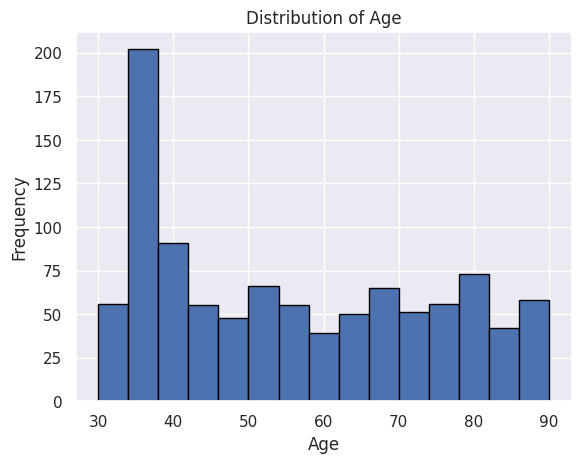

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set()

# 1. Histograms for Numerical Features
df['Age'].hist(bins=15, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

###2. Bar Plot

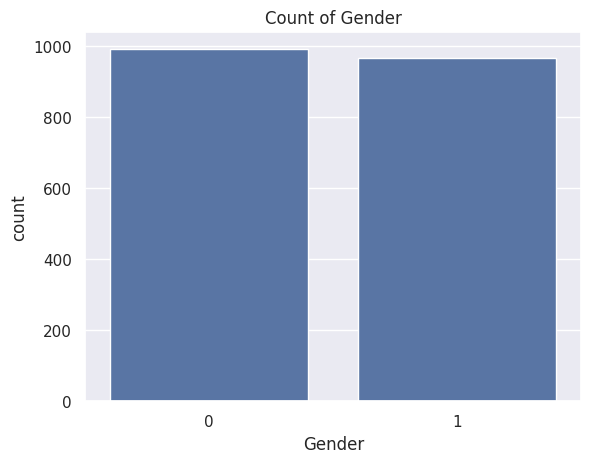

In [ ]:
sns.countplot(x='Gender', data=df)
plt.title('Count of Gender')
plt.show()

###3. Box Plot


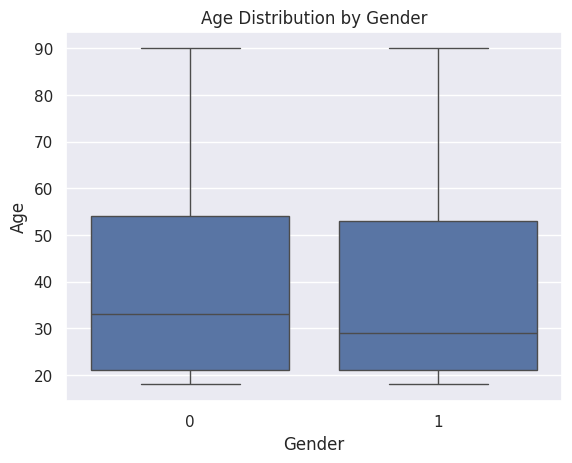

In [ ]:
# 3. Box Plot - Age by Gender
# Male = 0 and Female = 1
sns.boxplot(x='Gender', y='Age', data=df)
plt.title('Age Distribution by Gender')
plt.show()

###4. Heatmap

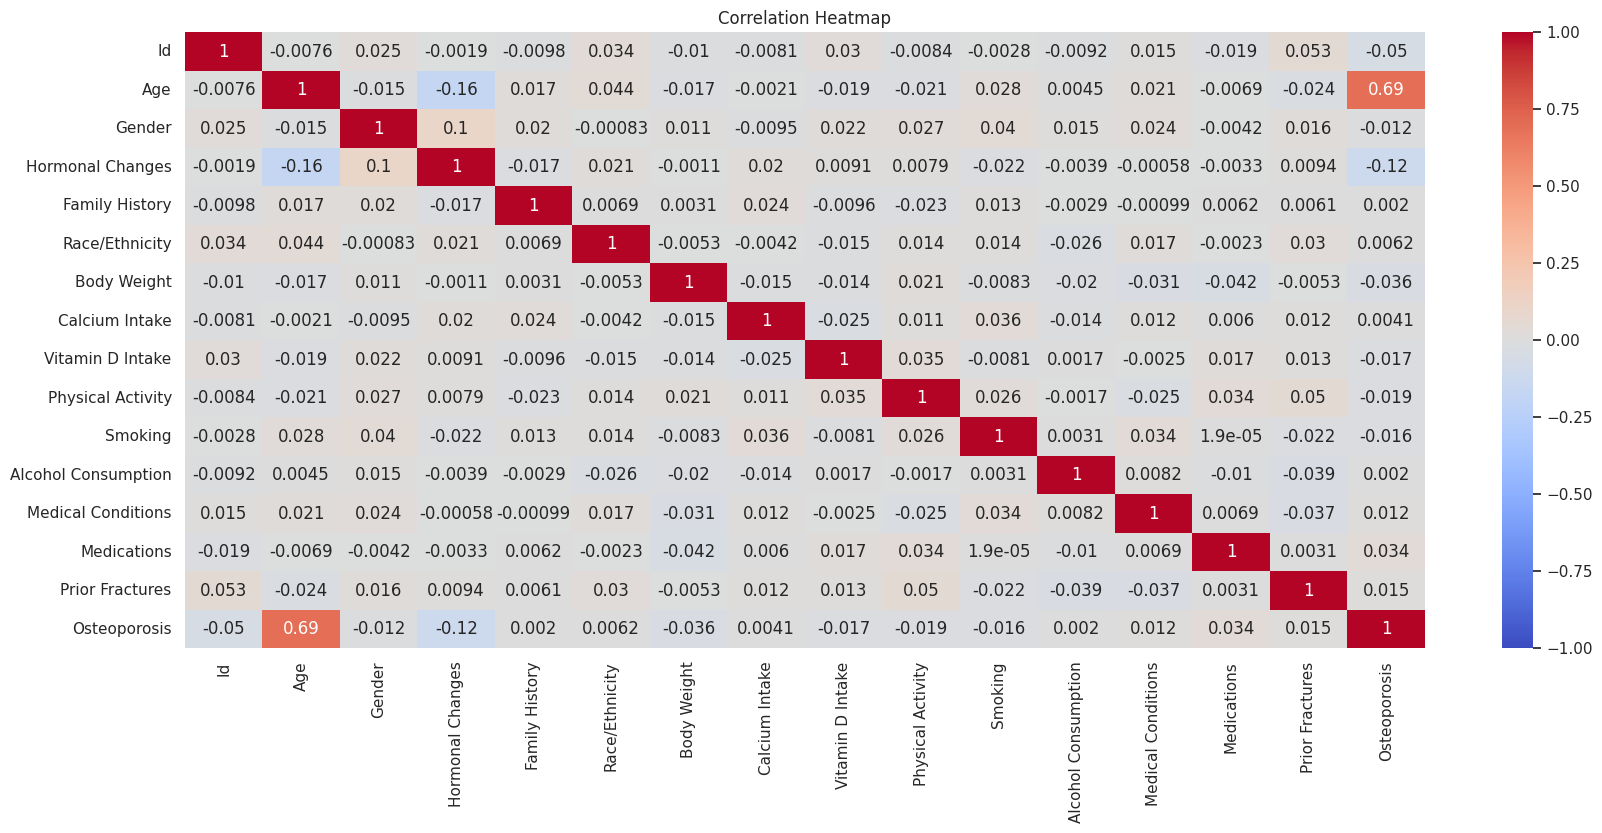

In [ ]:
# 4. Correlation Heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

###5. Count Plot

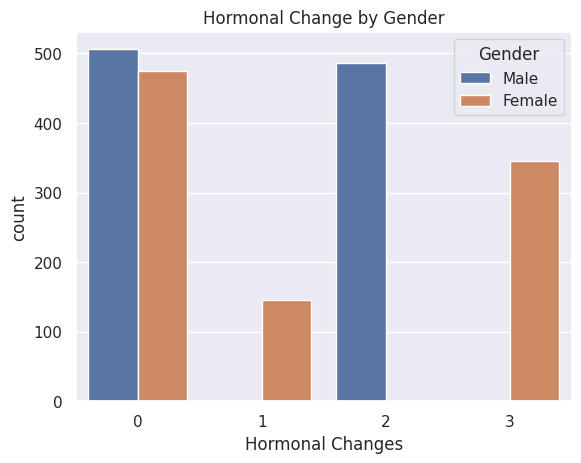

In [ ]:
# 5. Count Plot for Hormonal_Change by Gender
sns.countplot(x='Hormonal Changes', hue='Gender', data=df)
plt.title('Hormonal Change by Gender')
plt.legend(title='Gender', loc='upper right', labels=['Male', 'Female'])
plt.show()
#for X axis
# 0 = Normal
# 1 = Post menopause
# 2 = Andropause
# 3 = Early menopause

###6. Pie Chart

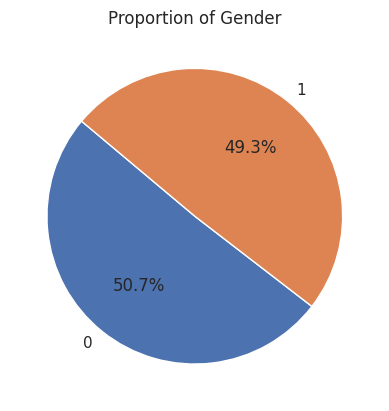

In [ ]:
# 8. Pie Chart - Proportion of Gender
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Gender')
plt.ylabel('')  # Hide the y-label
plt.show()
#0 -male
#1 -female